In [2]:
import pandas as pd

# Шлях до папки з файлами
folder_path = "data/data/"

# Прочитати файл data_2d.csv
data_2d = pd.read_csv(folder_path + "data_2d.csv")

# Прочитати файл mnist.csv
mnist = pd.read_csv(folder_path + "mnist.csv")

# Вивести перші декілька рядків з кожного файлу, щоб переконатися, що дані були правильно прочитані
print("data_2d:")
print(data_2d.head())

print("\nmnist:")
print(mnist.head())

# Тепер ви можете продовжити з обробкою та підготовкою даних для вашої задачі.
# Залежно від того, що саме ви плануєте робити, можливі різні методи обробки даних.
# Наприклад, для машинного навчання чи аналізу даних можуть знадобитися різні підходи.


data_2d:
   0.000000000000000000e+00  -7.687164597386728637e-01  \
0                       0.0                   2.687848   
1                       0.0                  -0.201379   
2                       0.0                   0.608496   
3                       0.0                  -0.082282   
4                       0.0                   2.083069   

   4.608603078297135447e-01  
0                  2.366961  
1                  0.470430  
2                  1.225400  
3                  1.137218  
4                  2.694482  

mnist:
   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0   

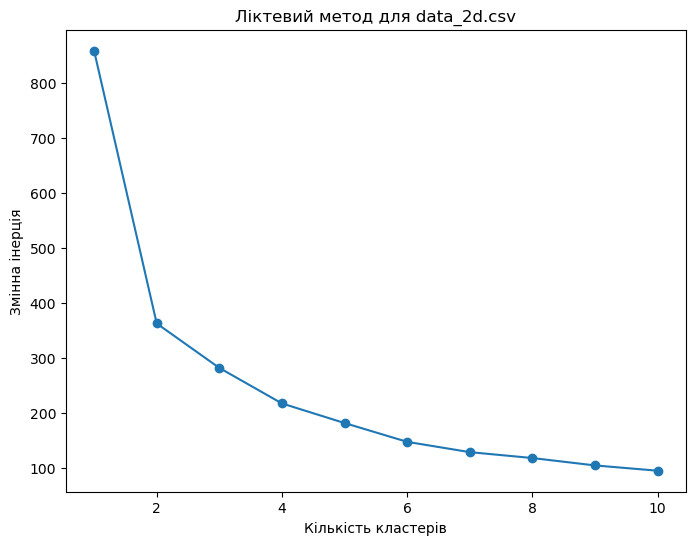

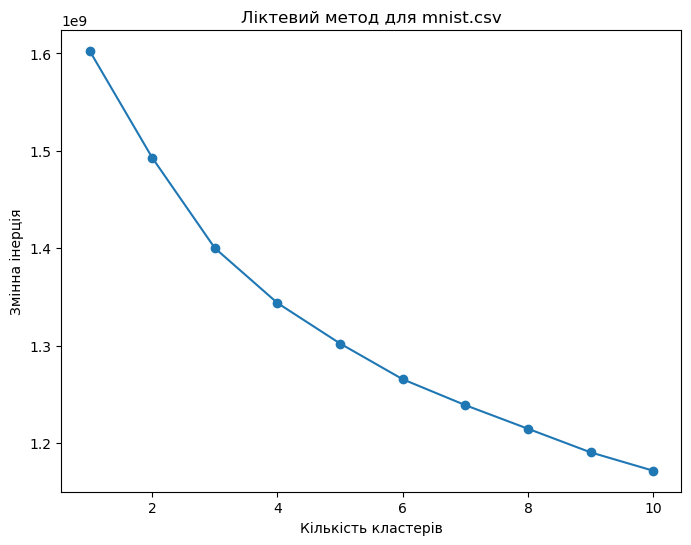

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
os.environ['OMP_NUM_THREADS'] = '1'
import warnings

# Вимкнути всі попередження
warnings.filterwarnings("ignore")

# Для data_2d.csv
X_2d = data_2d.values

# Знайдемо оптимальну кількість кластерів за допомогою ліктевого методу
distortions_2d = []
for i in range(1, 11):
    kmeans_2d = KMeans(n_clusters=i, random_state=0)
    kmeans_2d.fit(X_2d)
    distortions_2d.append(kmeans_2d.inertia_)

# Візуалізація ліктевого методу для data_2d.csv
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions_2d, marker='o')
plt.title('Ліктевий метод для data_2d.csv')
plt.xlabel('Кількість кластерів')
plt.ylabel('Змінна інерція')
plt.show()

# Для mnist.csv
X_mnist = mnist.values

# Знайдемо оптимальну кількість кластерів за допомогою ліктевого методу
distortions_mnist = []
for i in range(1, 11):
    kmeans_mnist = KMeans(n_clusters=i, random_state=0)
    kmeans_mnist.fit(X_mnist)
    distortions_mnist.append(kmeans_mnist.inertia_)

# Візуалізація ліктевого методу для mnist.csv
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions_mnist, marker='o')
plt.title('Ліктевий метод для mnist.csv')
plt.xlabel('Кількість кластерів')
plt.ylabel('Змінна інерція')
plt.show()


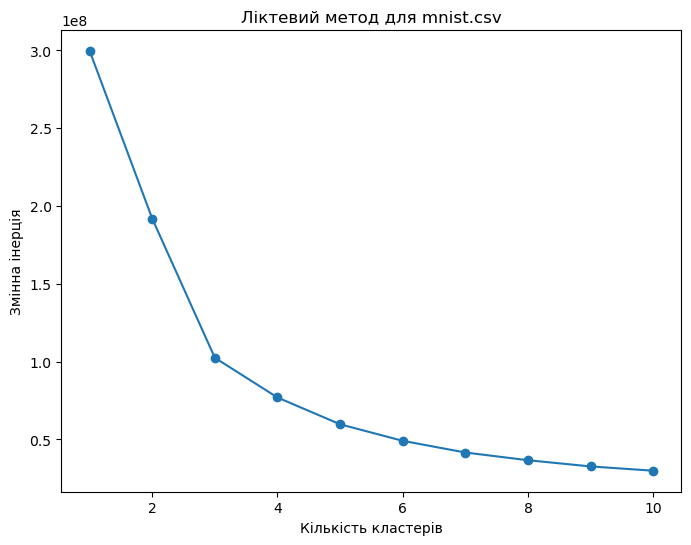

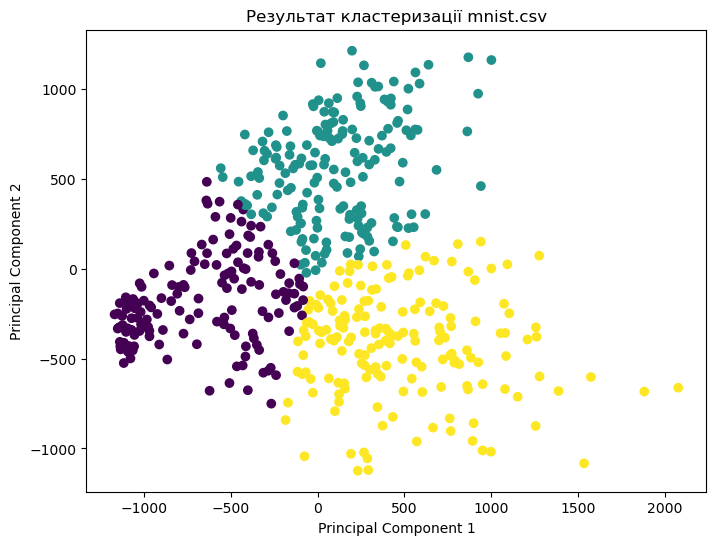

In [6]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Для mnist.csv
X_mnist = mnist.values

# Застосуємо алгоритм PCA для зменшення розмірності до 2-вимірного варіанту
pca = PCA(n_components=2)
X_mnist_reduced = pca.fit_transform(X_mnist)

# Знайдемо оптимальну кількість кластерів за допомогою ліктевого методу
distortions_mnist = []
for i in range(1, 11):
    kmeans_mnist = KMeans(n_clusters=i, random_state=0)
    kmeans_mnist.fit(X_mnist_reduced)
    distortions_mnist.append(kmeans_mnist.inertia_)

# Визуалізація ліктевого методу для mnist.csv
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions_mnist, marker='o')
plt.title('Ліктевий метод для mnist.csv')
plt.xlabel('Кількість кластерів')
plt.ylabel('Змінна інерція')
plt.show()

# Вибираємо оптимальну кількість кластерів
optimal_clusters = 3  # Припустимо, що оптимальна кількість кластерів - 3

# Використовуємо K-means для кластеризації даних
kmeans_mnist_optimal = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans_mnist_optimal.fit(X_mnist_reduced)
cluster_labels = kmeans_mnist_optimal.labels_

# Визуалізація результатів кластеризації
plt.figure(figsize=(8, 6))
plt.scatter(X_mnist_reduced[:, 0], X_mnist_reduced[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Результат кластеризації mnist.csv')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
